In [1]:
# Reference:
# https://medium.com/the-downlinq/getting-started-with-spacenet-data-827fd2ec9f53
# https://gist.github.com/avanetten/dd180414aa59dabe3ca839b000166103#file-plot_truth_coords-py

In [2]:
import sys
sys.path.append('../../src/features/spacenet_lib')
from geojson_to_pixel_arr import geojson_to_pixel_arr

In [3]:
from os import path
from PIL import Image
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_truth_coords(raster_path, pixel_coords,   
                      figsize=(8,8), plot_name='',
                      add_title=False, poly_face_color='orange', 
                      poly_edge_color='red', poly_nofill_color='blue', cmap='bwr'):
    '''
    Plot ground truth coordinaates
    pixel_coords should be a numpy array
    '''
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*figsize[0], figsize[1]))
    
    if add_title:
        suptitle = fig.suptitle(plot_name.split('/')[-1], fontsize='large')
    
    # create patches
    patches = []
    patches_nofill = []
    if len(pixel_coords) > 0:
        # get patches    
        for coord in pixel_coords:
            patches_nofill.append(Polygon(coord, facecolor=poly_nofill_color, 
                                          edgecolor=poly_edge_color, lw=3))
            patches.append(Polygon(coord, edgecolor=poly_edge_color, fill=True, 
                                   facecolor=poly_face_color))
        p0 = PatchCollection(patches, alpha=0.25, match_original=True)
        #p1 = PatchCollection(patches, alpha=0.75, match_original=True)
        p2 = PatchCollection(patches_nofill, alpha=0.75, match_original=True)
    
    # load raster file as numpy array
    raster = Image.open(raster_path)
    raster = np.asarray(raster)
    
    # ax0: raw image
    ax0.imshow(raster)
    if len(patches) > 0:
        ax0.add_collection(p0)
    ax0.set_title('Input Image + Ground Truth Buildings') 
    
    # truth polygons
    zero_arr = np.zeros(raster.shape[:2])
    # set background to white?
    #zero_arr[zero_arr == 0.0] = np.nan
    ax1.imshow(zero_arr, cmap=cmap)
    if len(patches) > 0:
        ax1.add_collection(p2)
    ax1.set_title('Ground Truth Building Polygons')
        
    #plt.axis('off')
    plt.tight_layout()
    if add_title:
        suptitle.set_y(0.95)
        fig.subplots_adjust(top=0.96)
    plt.show()
 
    if len(plot_name) > 0:
        plt.savefig(plot_name)
    
    return patches, patches_nofill

In [5]:
def get_filepaths(data_idx):
    # Modify the the paths based on your raster and geojson data location.
    raster_dir = '../../data/processedBuildingLabels/3band'
    geojson_dir = '../../data/processedBuildingLabels/vectordata/geojson/'
    
    raster_filename = '3band_AOI_1_RIO_img{}.tif'.format(data_idx)
    geojson_filename = 'Geo_AOI_1_RIO_img{}.geojson'.format(data_idx)
    
    return path.join(raster_dir, raster_filename), path.join(geojson_dir, geojson_filename)

In [6]:
def show(data_idx):
    raster_path, geojson_path = get_filepaths(data_idx)
    
    pixel_coords, _ = geojson_to_pixel_arr(raster_path, geojson_path)
    
    plot_truth_coords(raster_path, pixel_coords)

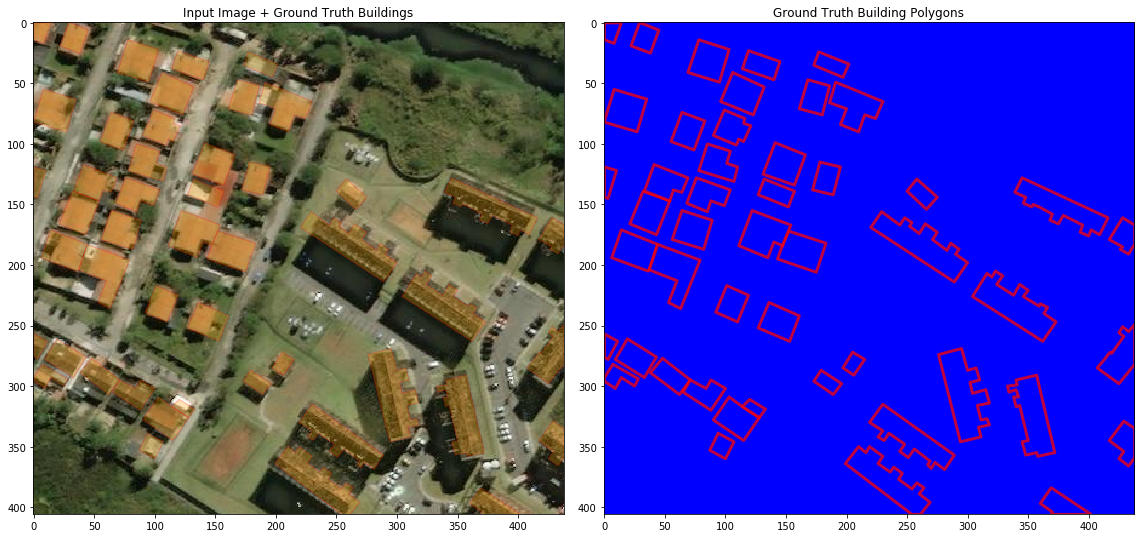

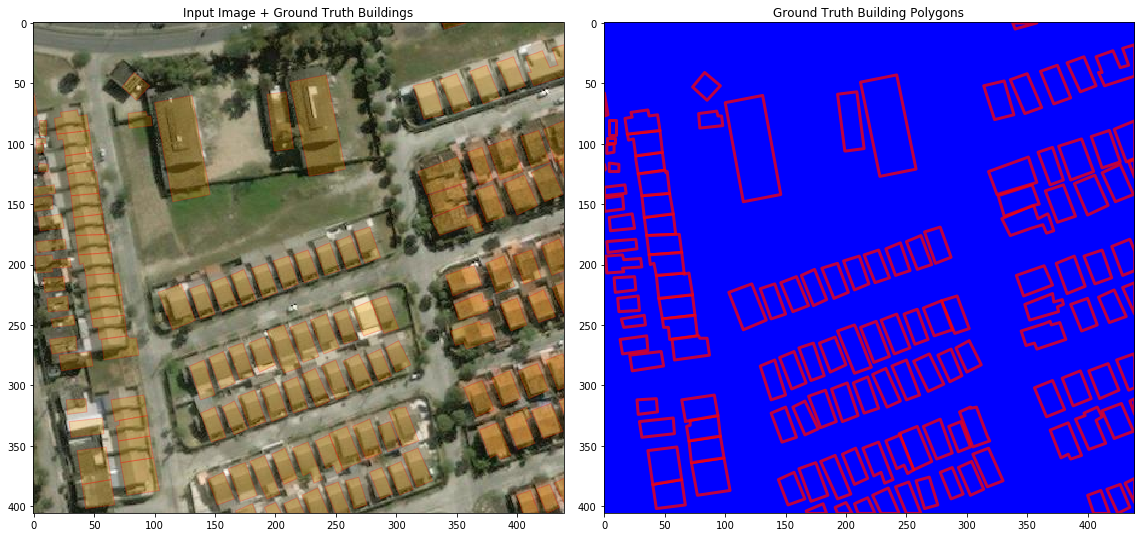

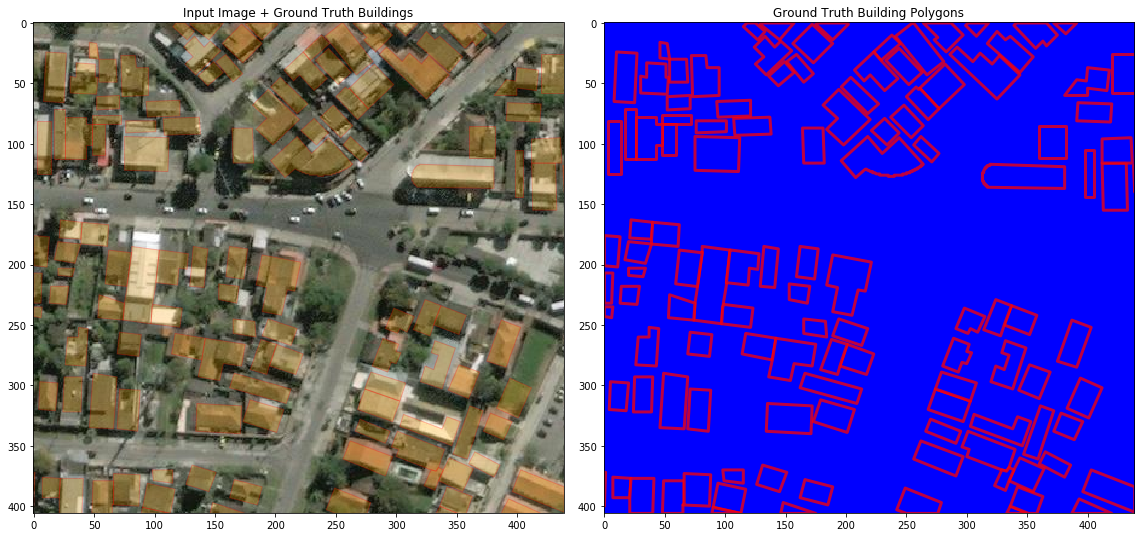

In [7]:
# Show some samples
for idx in [1823, 5865, 6046]:
    show(data_idx=idx)